<a href="https://colab.research.google.com/github/mic0430/cs131/blob/master/a4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     2.00000
total sulfur dioxide    9.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
dtype: float64
fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
q

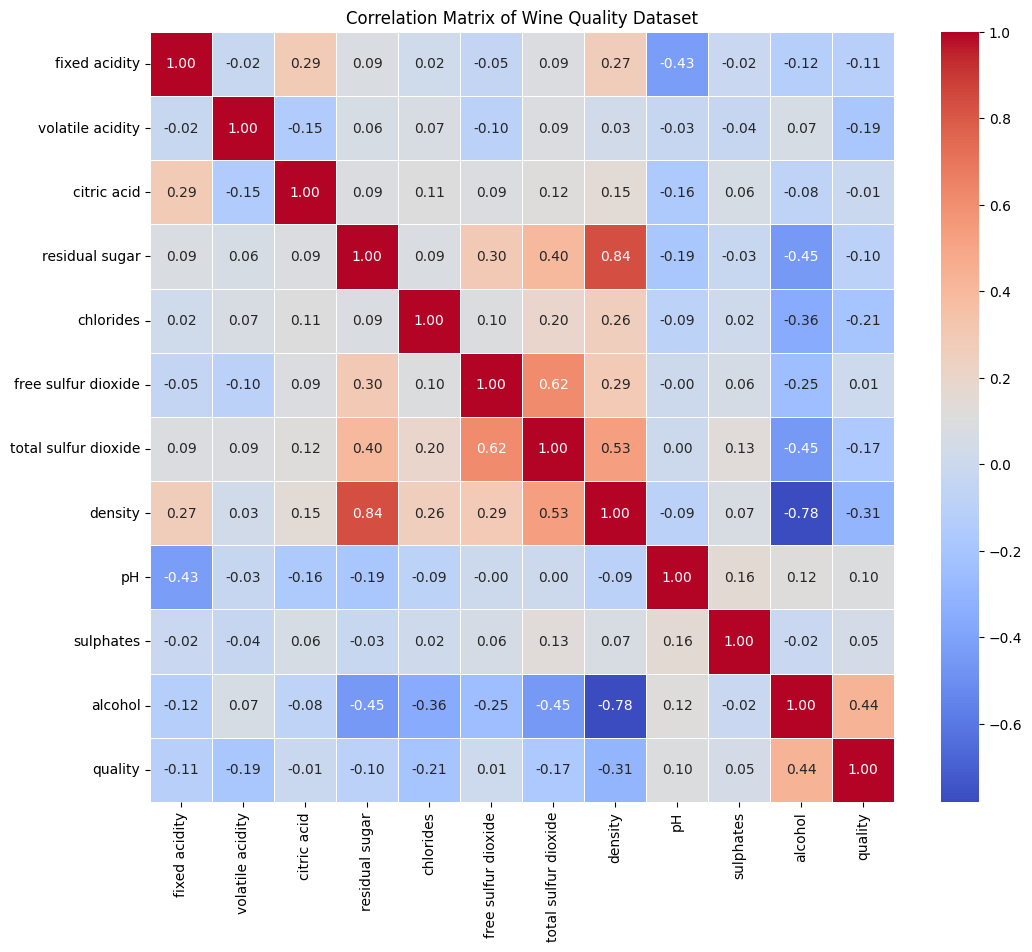

<ipython-input-3-a3b480544843>:60: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=scaled_df, inner="quartile", scale="width", palette="muted")


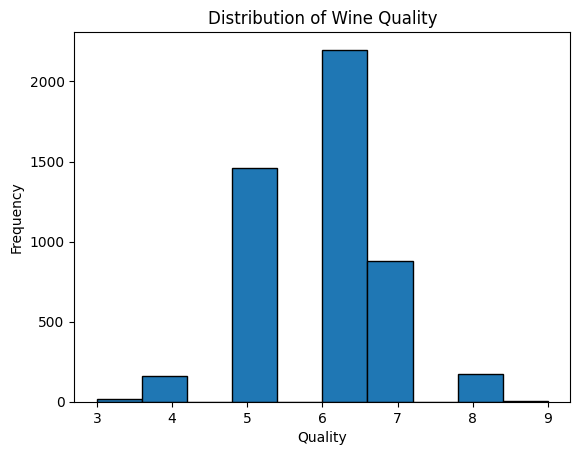

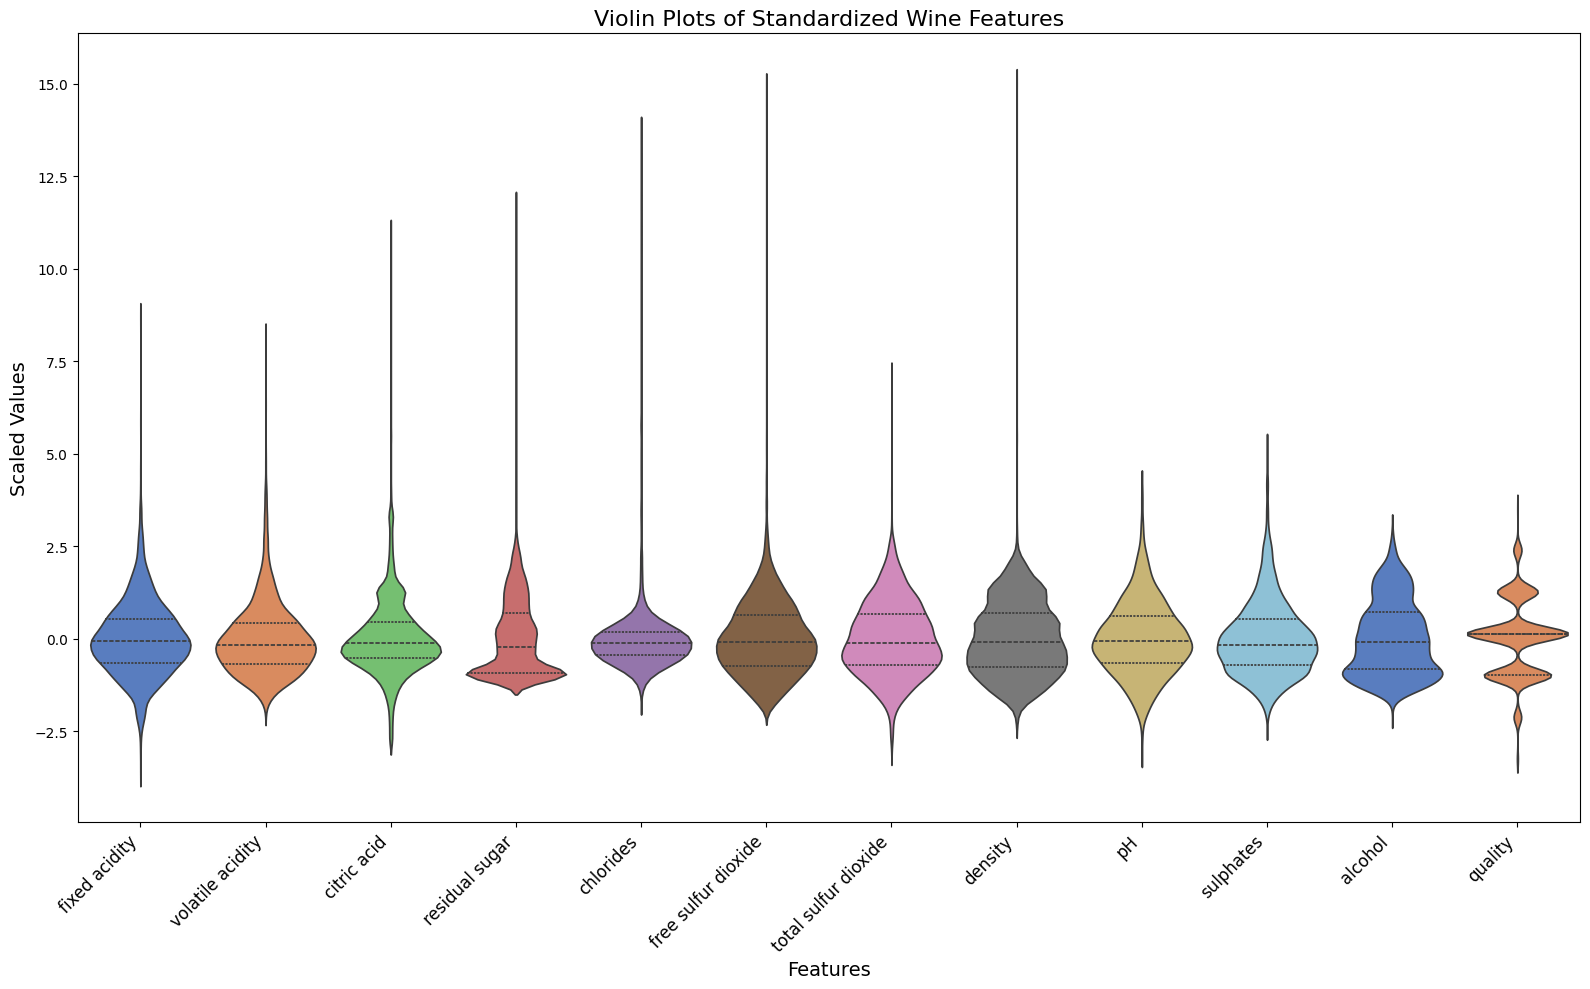

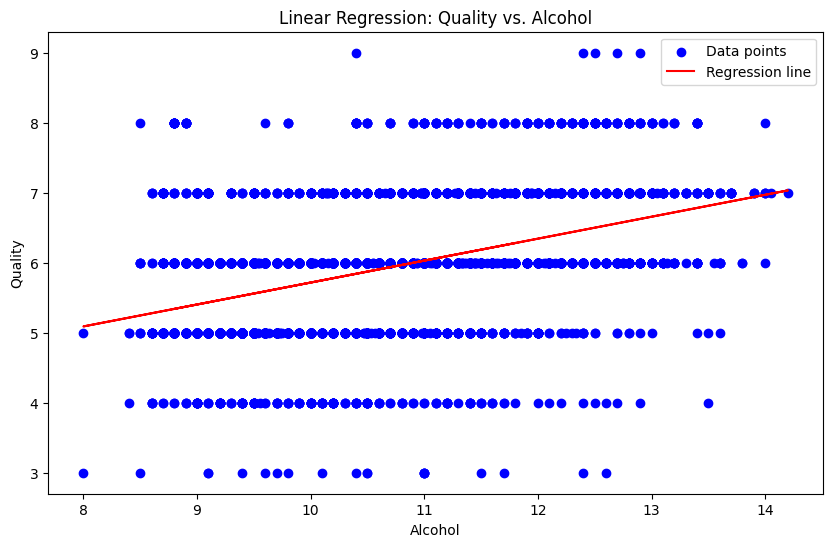

Intercept = 2.582009399174922
Coefficient = 0.3134693019118325
RMSE = 0.7971284628753889
R2 = 0.1897253327492563
Intercept = -36.498611307001624
Coefficients = [-2.07211594  0.39889282 38.99188669]
RMSE = 0.76848726881725
R^2 = 0.24690635619896484


In [3]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/winequality-white.csv', delimiter = ";")

print(df.columns)

# Task 1:

df.mean()

print(df.min())
print(df.max())

print('25th')
print(df.quantile(0.25))
print('50th')
print(df.quantile(0.5))
print('75th')
print(df.quantile(0.75))

df.describe()



# Task 2:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()




#Task 3:
wine = df
wine.describe()

ax = wine['quality'].plot.hist(edgecolor='black')
ax.set_xlabel('Quality')
ax.set_title('Distribution of Wine Quality')




wine = df

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Task 4:
plt.figure(figsize=(16, 10))
sns.violinplot(data=scaled_df, inner="quartile", scale="width", palette="muted")

plt.title('Violin Plots of Standardized Wine Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Scaled Values', fontsize=14)

plt.tight_layout()
plt.show()

# Task 5


plt.figure(figsize=(10, 6))
plt.scatter(df['alcohol'], df['quality'], label='Data points', color='blue')

model = LinearRegression()
model.fit(df[['alcohol']], df['quality'])


fitted_line = model.predict(df[['alcohol']])
plt.plot(df['alcohol'], fitted_line, color='red', label='Regression line')


plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Linear Regression: Quality vs. Alcohol')
plt.legend()
plt.show()


print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')

RMSE = np.sqrt(mean_squared_error(df['quality'], fitted_line))
R2 = r2_score(df['quality'], fitted_line)

print(f'RMSE = {RMSE}')
print(f'R2 = {R2}')


# Task 6:

X_multi = df[['volatile acidity', 'alcohol', 'density']]
y_quality = df['quality']

model = LinearRegression()
model.fit(X_multi, y_quality)

print(f'Intercept = {model.intercept_}')
print(f'Coefficients = {model.coef_}')

fitted = model.predict(X_multi)
RMSE = np.sqrt(mean_squared_error(y_quality, fitted))
R2 = r2_score(y_quality, fitted)

print(f'RMSE = {RMSE}')
print(f'R^2 = {R2}')
